In [1]:
# data manipulation
import pandas as pd
import numpy as np

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# pipeline construction
from sklearn.pipeline import FeatureUnion, Pipeline 
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer

# data processing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

# models trainng
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# models validation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# remove annoying warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r'C:\Users\Jakub\Desktop\GitHubProjects\hotel_booking_project\hotel_bookings.csv')
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


I shufle the data as a good practice.

In [3]:
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,City Hotel,1,49,2017,July,28,12,0,1,2,...,No Deposit,52.0,NaN,0,Transient,80.1,0,1,Canceled,2017-05-27
1,City Hotel,1,33,2015,October,43,21,0,4,1,...,No Deposit,6.0,NaN,0,Transient,17.6,0,1,Canceled,2015-09-28
2,City Hotel,0,0,2016,April,17,23,1,1,1,...,No Deposit,9.0,NaN,0,Transient,123.0,1,0,Check-Out,2016-04-25
3,Resort Hotel,0,13,2016,August,36,29,0,0,1,...,No Deposit,339.0,NaN,0,Transient-Party,0.0,0,1,Check-Out,2016-08-29
4,City Hotel,1,268,2015,July,29,12,2,1,2,...,No Deposit,5.0,NaN,0,Transient,82.0,0,0,Canceled,2015-06-26


# Basic Exploratory Data Analysis

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
data.shape

(119390, 32)

We can see that there are some columns where some of the values are null, we will have to manage it later on during the processing stage.

In [7]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


We can see that 37% of the entire is_canceled variable are "1". It is a little bit imbalanced but it should not be a huge problem in this case.

Now lets see the unique values per column:

In [8]:
for column in data:
    print(f'{column} - {len(data[column].unique())}')
    print(data[column].unique())
    print()

hotel - 2
['City Hotel' 'Resort Hotel']

is_canceled - 2
[1 0]

lead_time - 479
[ 49  33   0  13 268   9  82 210 154 271 364  78  29 496   3 100 299 236
 418 174 121  72  51  22 129  14  31 235 332 162  27  40  93  15   5  96
  62 188  20  75 109 281  41 142 178  19  83  87 211  11   1  17 192  52
 150  84  70  89  60 105  63  99 218 134  30  38  59  34 207  46  69  68
  58 185  79 156 240 141 186 169  42 367  64  32 180  88 304  54 101  53
 112   2 103  86 230 219  10 161 358 111 108  23 122  39 135  94 146 198
 315 131  35  91  76   8   4 265 226  18  81  66 115  24 160 475  74  97
 199 200  37 212 176 222 275 116 409 310  28 128 208  36  16  45  61 165
 155 119 464 163 118  47  95 261 114 183   6  44 126 123 140 164 305 260
 319 107 158 130  12 151  77 138  92 316 322  56 274 255 152 269  43 317
 454 221 264  98 181 133 351  65 414 204 173 136 383  90 127 244  85 175
 215 213   7 386  57 149 124  80 157 405 144  71 256 132 106 206 117 143
  67 102 318 309 166 258 245  48 194 216 292

Missing Values

In [9]:
a = data.isna().mean()*100
a[a>0]

children     0.003350
country      0.408744
agent       13.686238
company     94.306893
dtype: float64

In [10]:
a = data.isna().sum()
a[a>0]

children         4
country        488
agent        16340
company     112593
dtype: int64

Distributions

In [11]:
numeric_columns = data.select_dtypes(include=np.number).columns
list(numeric_columns)

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [12]:
non_numeric_columns = data.select_dtypes(exclude=np.number).columns
non_numeric_columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date'],
      dtype='object')

Numeric Columns:

Column: is_canceled
Unique values: 2


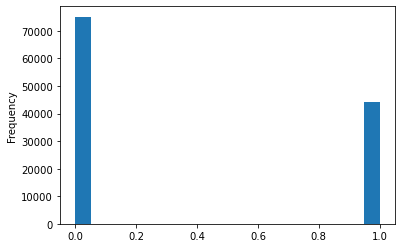

Column: lead_time
Unique values: 479


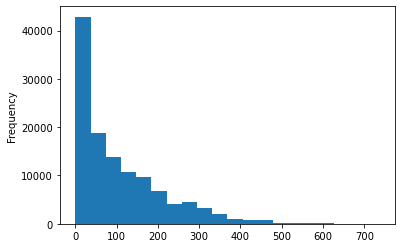

Column: arrival_date_year
Unique values: 3


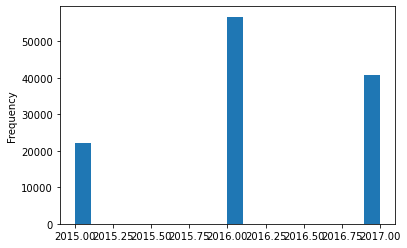

Column: arrival_date_week_number
Unique values: 53


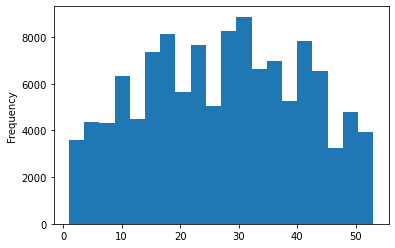

Column: arrival_date_day_of_month
Unique values: 31


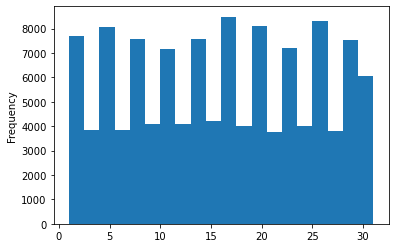

Column: stays_in_weekend_nights
Unique values: 17


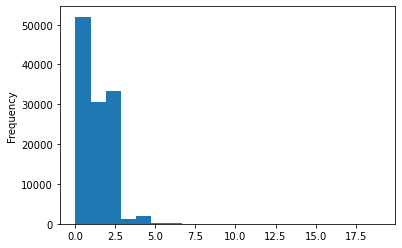

Column: stays_in_week_nights
Unique values: 35


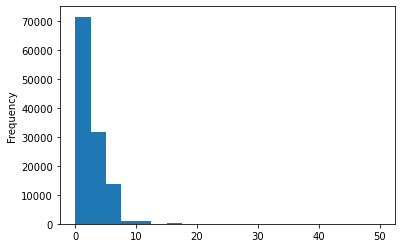

Column: adults
Unique values: 14


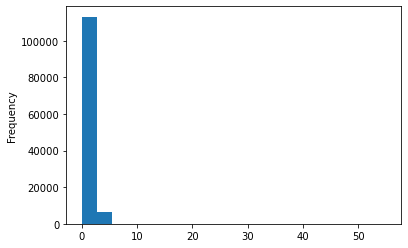

Column: children
Unique values: 6


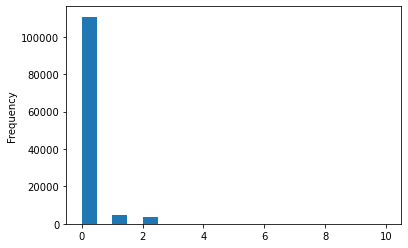

Column: babies
Unique values: 5


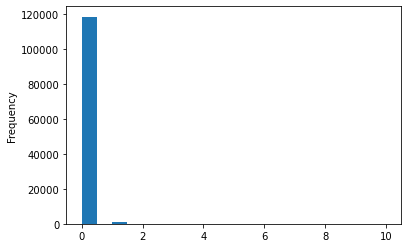

Column: is_repeated_guest
Unique values: 2


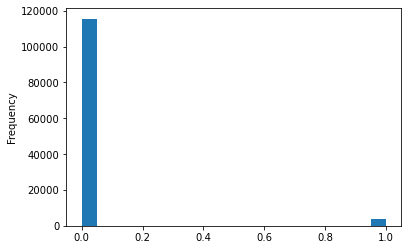

Column: previous_cancellations
Unique values: 15


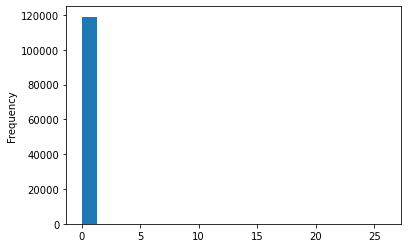

Column: previous_bookings_not_canceled
Unique values: 73


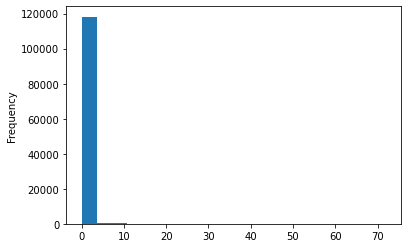

Column: booking_changes
Unique values: 21


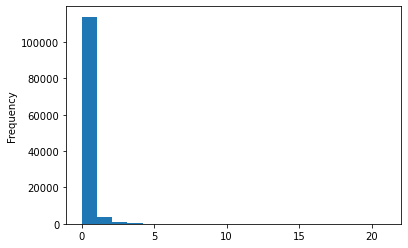

Column: agent
Unique values: 334


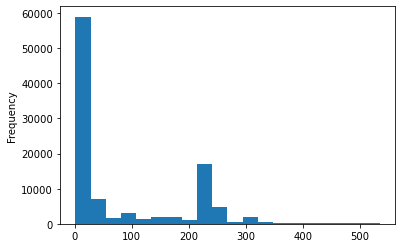

Column: company
Unique values: 353


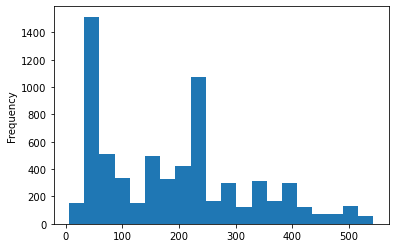

Column: days_in_waiting_list
Unique values: 128


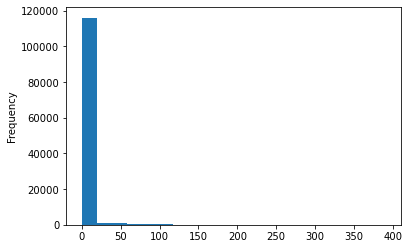

Column: adr
Unique values: 8879


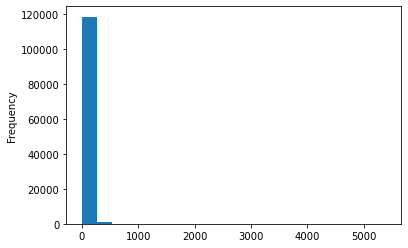

Column: required_car_parking_spaces
Unique values: 5


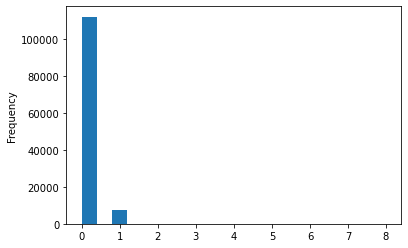

Column: total_of_special_requests
Unique values: 6


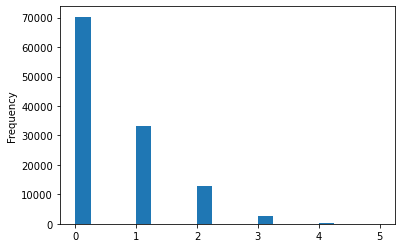

In [13]:
for column in numeric_columns:
    print(f'Column: {column}')
    print(f'Unique values: {len(data[column].unique())}')
    data[column].plot.hist(bins=20)
    plt.show()

Categorical Columns:

Columns: hotel
Unique values: 2


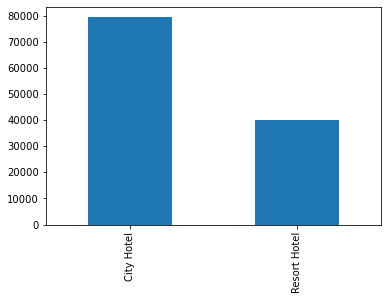

Columns: arrival_date_month
Unique values: 12


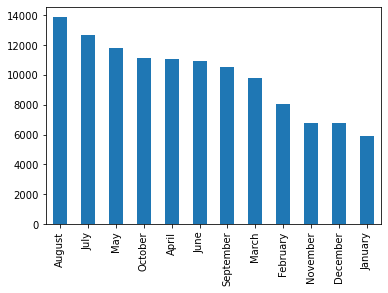

Columns: meal
Unique values: 5


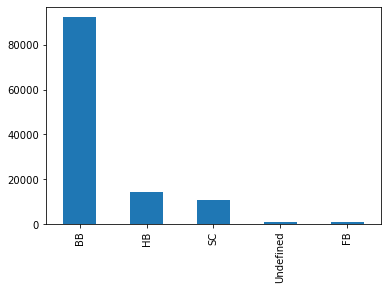

Columns: country
Unique values: 178


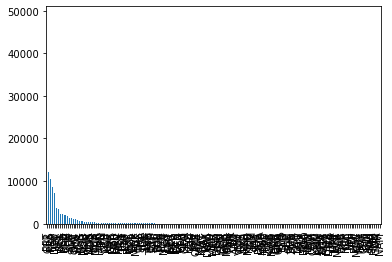

Columns: market_segment
Unique values: 8


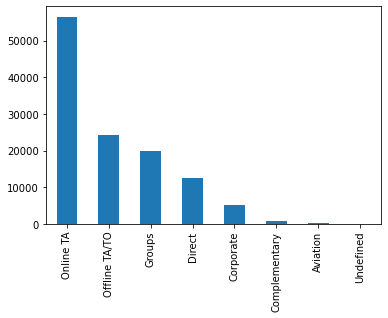

Columns: distribution_channel
Unique values: 5


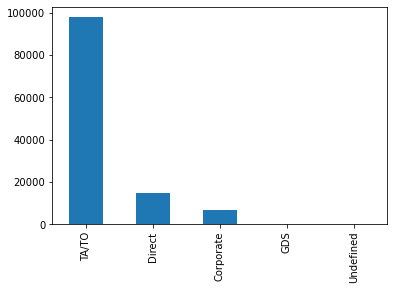

Columns: reserved_room_type
Unique values: 10


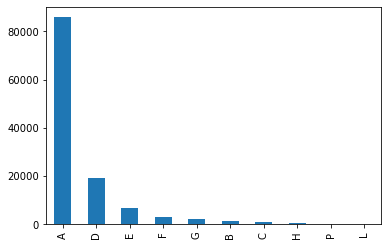

Columns: assigned_room_type
Unique values: 12


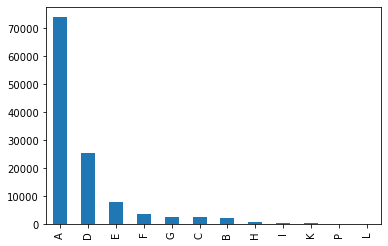

Columns: deposit_type
Unique values: 3


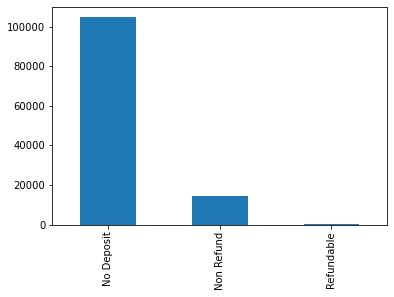

Columns: customer_type
Unique values: 4


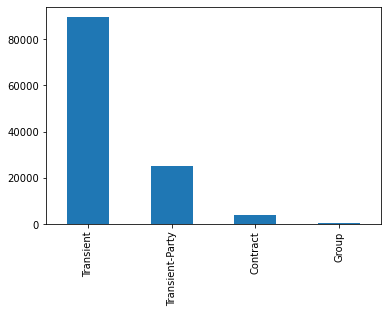

Columns: reservation_status
Unique values: 3


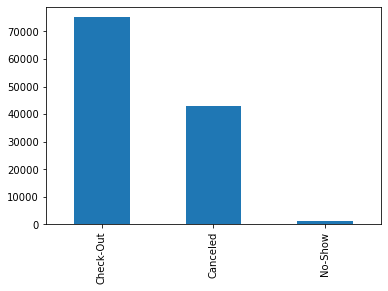

Columns: reservation_status_date
Unique values: 926


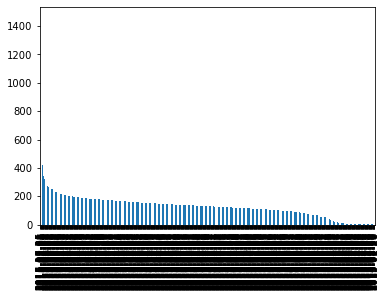

In [14]:

for column in non_numeric_columns:
    print(f'Columns: {column}')
    print(f'Unique values: {len(data[column].unique())}')
    data[column].value_counts().plot.bar()
    plt.show()

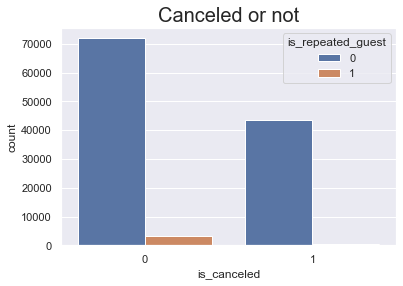

In [15]:
sns.set(style = "darkgrid")
plt.title("Canceled or not", fontdict = {'fontsize': 20})
ax = sns.countplot(x = "is_canceled", hue = 'is_repeated_guest', data = data)

From the graph above we can assume that repeated guests do not cancel their reservations. The data looks logic.

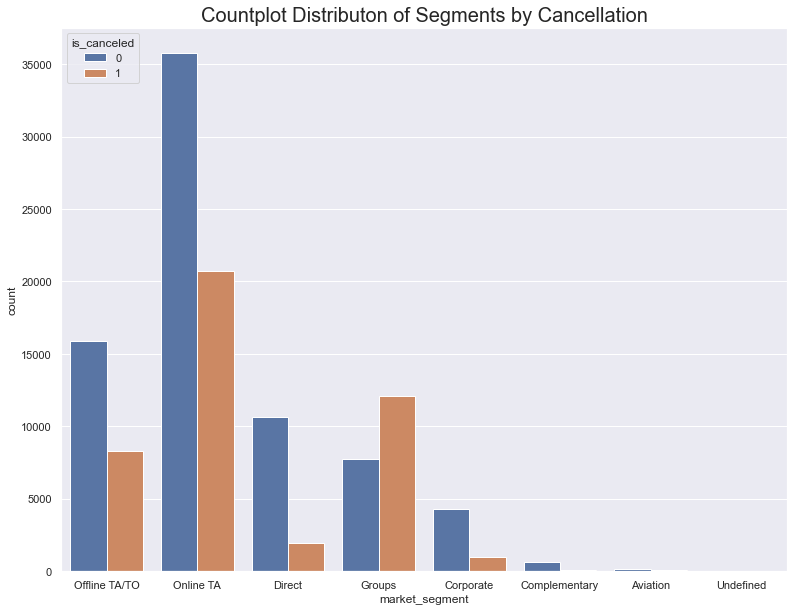

In [16]:
plt.figure(figsize = (13,10))
sns.set(style = "darkgrid")
plt.title("Countplot Distributon of Segments by Cancellation", fontdict = {'fontsize':20})
ax = sns.countplot(x = "market_segment", hue = 'is_canceled', data = data)

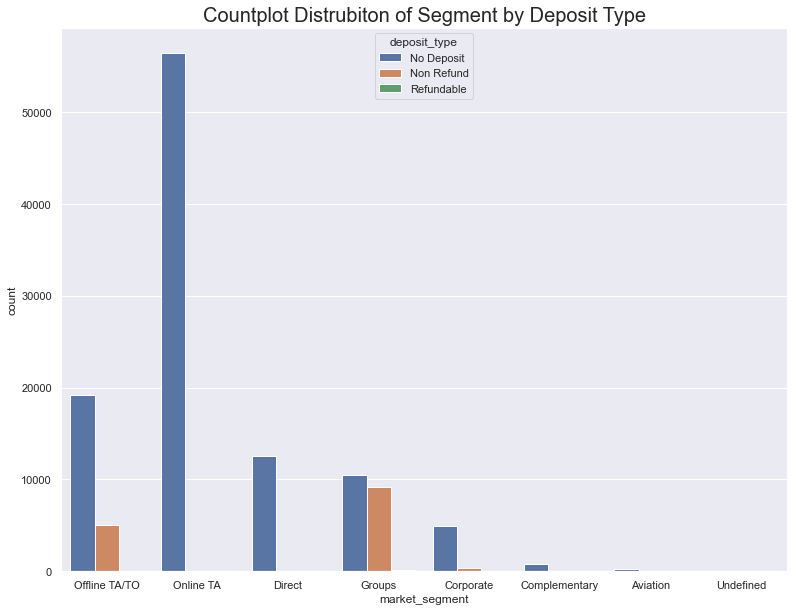

In [17]:
plt.figure(figsize = (13,10))
sns.set(style = "darkgrid")
plt.title("Countplot Distrubiton of Segment by Deposit Type", fontdict = {'fontsize':20})
ax = sns.countplot(x = "market_segment", hue = 'deposit_type', data = data)

- When we look at Distribution of Segment by Deposit Type graph it is clear that Group reservations are often made with Non Refund Deposit - which is quite obvious because group reservations are much bigger than individual guests and they require reservation of many rooms. When the group cancels the reservation, hotel will not be easily able to fill the empty rooms.
- I guess that case with Offline TA/TO is similar. Travel Agents probably reserve many rooms at the same time so they may be treated same as groups - these are only my assumption, I am not sure of this case.

In [18]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', \
         'November', 'December']

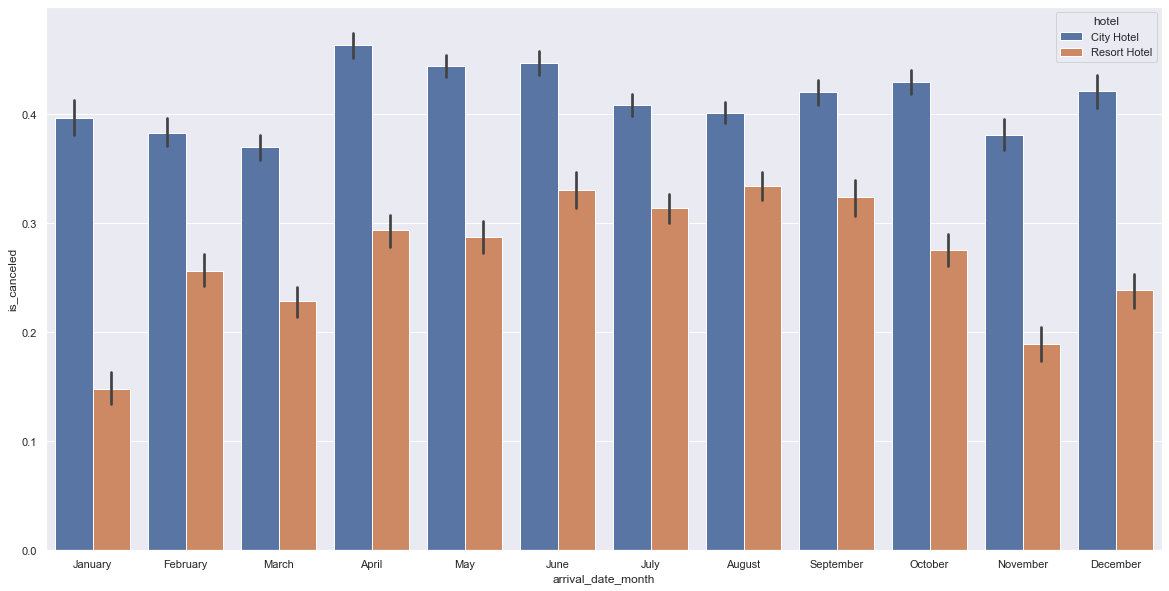

In [19]:
plt.figure(figsize = (20,10))
sns.barplot(x = 'arrival_date_month', y = 'is_canceled', hue = 'hotel', data = data, order = months);

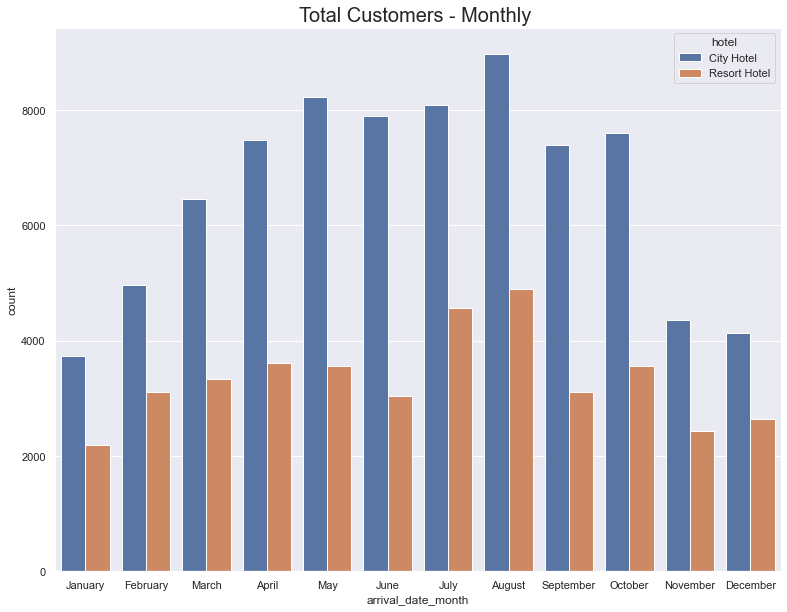

In [20]:
plt.figure(figsize =(13,10))
sns.set(style="darkgrid")
plt.title("Total Customers - Monthly ", fontdict={'fontsize': 20})
ax = sns.countplot(x = "arrival_date_month", hue = 'hotel', data = data, order = months)

We can clearly see that during winter time there is a lot less guests in both hotels. The cancelation rate is lower in that period of time as well in Resort Hotel. In City Hotel the cancelation rate is generally on the constant level for the entire year.

How to deal with Country variable?

In [21]:
data.country.value_counts().head(20)

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
USA     2097
CHE     1730
CN      1279
AUT     1263
SWE     1024
CHN      999
POL      919
ISR      669
RUS      632
NOR      607
Name: country, dtype: int64

# Feature Engineering

Conclusions:
- Numeric columns are skewed. For linear algorithms it can be a problem. Log or Yeo-Jonson transformation may help.

Categorical columns:
- City and Resort hotel: change for binary
- Arrival date month: one hot encoding (?) - not sure yet
- Meal: BB + others
- Country: Group the countries
- Market_segment: Online TA, Offline TA/TO, Groups, Others
- Distribution_channel: TA/TO, Others
- Reserved_room_type: A, Others
- Assigned_room_type: A, D, Others
- deposit_type: No Deposit, Non Refund Deposit, Refundable
- Customer_type: Transient, Others
- Reservation_status: CHeck-out, Canceled, No-show
- reservation_status_date: Remove(?)

Numeric columns:
- Company: Remove, too many missing values
- Agent: Remove
- Children: fill with mode
- Country: drop NA

In [22]:
df = data.copy()

In [23]:
# I want to remove "company" and "reservation_status_date" + "agent"

class RemoveColumnsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_remove: list):
        self.columns_to_remove = columns_to_remove
    
    # even if nothing to fit, this method must return self
    def fit(self, X, y = None ):
        return self 
    
    def transform(self, X, y = None ):
        return X.drop(self.columns_to_remove, axis=1)

In [24]:
class SelectColumnsByTypeTransformer(BaseEstimator, TransformerMixin):
    def __init__( self, type_to_select):
        self.type_to_select = type_to_select
    
    
    def fit( self, X, y = None ):
        return self 
    
    def transform( self, X, y = None ):
        if self.type_to_select == 'numeric':
            return X.select_dtypes(include=np.number)
        else:
            return X.select_dtypes(exclude=np.number)

In [25]:
class HotelTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit( self, X, y = None ):
        return self 
    
    def transform( self, X, y = None ):
        X['hotel'] = X['hotel'].apply(lambda x: 0 if x=='Resort Hotel' else 1)
        return X

In [26]:
class Market_segment_Transformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit( self, X, y = None ):
        return self 
    
    def transform( self, X, y = None ):
        categories = ['Online TA', 'Offline TA/TO', 'Groups', 'Direct']
        X['market_segment'] = X['market_segment'].apply(lambda x: "Other" if x not in categories else x)
        return X

In [27]:
class ChannelTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit( self, X, y = None ):
        return self 
    
    def transform( self, X, y = None ):
        X['distribution_channel'] = X['distribution_channel'].apply(lambda x: 1 if x=='TA/TO' else 0)
        return X

In [28]:
class ReservedTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit( self, X, y = None ):
        return self 
    
    def transform( self, X, y = None ):
        X['reserved_room_type'] = X['reserved_room_type'].apply(lambda x: 1 if x=='A' else 0)
        return X

In [29]:
class AssignedTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit( self, X, y = None ):
        return self 
    
    def transform( self, X, y = None ):
        categories = ['A', 'D']
        X['assigned_room_type'] = X['assigned_room_type'].apply(lambda x: "Other" if x not in categories else x)
        return X

In [30]:
class CustomerTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit( self, X, y = None ):
        return self 
    
    def transform( self, X, y = None ):
        X['customer_type'] = X['customer_type'].apply(lambda x: 1 if x=='Transient' else 0)
        return X

In [31]:
class ImputeNumColsTransformer(BaseEstimator, TransformerMixin):
    def __init__( self, method):
        self.method=method
        # for keeping values to impute any specified column
        self.impute_values = {}
        
    def fit( self, X, y = None ):
        if self.method == 'mean':
            for col in X:
                mean = X[col].mean()
                self.impute_values[col] = mean
        # extra option is added here
        elif self.method == 'median':
            for col in X:
                median = X[col].median()
                self.impute_values[col] = median
            
        return self 
    
    def transform( self, X, y = None ):
        for col in X:
            value_to_impute = self.impute_values[col]
            X[col] = X[col].fillna(value_to_impute)
        return X

In [32]:
class ImputeCatColsTransformer(BaseEstimator, TransformerMixin):
    def __init__( self, method='mode'):
        self.method=method
        # for keeping values to impute any specified column
        self.impute_values = {}
        
    def fit( self, X, y = None ):
        if self.method == 'mode':
            for col in X:
                mode = X[col].mode()[0]
                self.impute_values[col] = mode
        elif self.method == 'missing':
            for col in X:
                self.impute_values[col] = 'missing'
        return self 
    
    def transform( self, X, y = None ):
        for col in X:
            value_to_impute = self.impute_values[col]
            X[col] = X[col].astype('object')
            X[col] = X[col].fillna(value_to_impute)
        return X

In [33]:
class DropNATransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
        
        
    def fit( self, X, y = None ):
        return self 
    
    def transform( self, X, y = None ):
        df_features = X.copy()      
        
        # drop missing values
        df_features = df_features.dropna()
    
        return df_features

In [34]:
class GetDummiesTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
        
        
    def fit( self, X, y = None ):
        return self 
    
    def transform( self, X, y = None ):
        df_features = X.copy()      
        
        # drop missing values
        df_features = pd.get_dummies(df_features)
    
        return df_features

In [35]:
class SelectColumnsTransformer(BaseEstimator, TransformerMixin):
    def __init__( self, columns_to_select: list):
        self.columns_to_select = columns_to_select
    
    # even if nothing to fit, this method must return self
    def fit( self, X, y = None ):
        return self 
    
    def transform( self, X, y = None ):
        return X[self.columns_to_select]

In [36]:
class MealTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit( self, X, y = None ):
        return self 
    
    def transform( self, X, y = None ):
        X['meal'] = X['meal'].apply(lambda x: 'BB' if x=='BB' else 'Other')
        return X

In [37]:
num_cols = list(numeric_columns[1:])
num_cols

['lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [38]:
cat_cols = list(non_numeric_columns)
cat_cols

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [ ]:
# split data into training and test set 
X_train, X_test, y_train, y_test = train_test_split(data.drop('is_canceled', axis=1), 
                                                    data['is_canceled'], 
                                                    test_size=0.2,
                                                    stratify=data['is_canceled'],
                                                    random_state=42)

In [50]:
# Numeric columns PIPELINE

steps1 = [
    ('selector1', SelectColumnsByTypeTransformer(type_to_select='numeric')),
    ('remove1', RemoveColumnsTransformer(columns_to_remove=['company', 'agent'])),
    ('imputer', ImputeNumColsTransformer(method='median')), 
    ('scaler', StandardScaler())
]

transformer_1 = Pipeline(steps=steps1)


steps2 = [
    ('selector2', SelectColumnsByTypeTransformer(type_to_select='categorical')),
    ('remove2', RemoveColumnsTransformer(columns_to_remove=['arrival_date_month', 'reservation_status_date', 'country'])),
    ('hotel', HotelTransformer()),
    ('market_segmentation', Market_segment_Transformer()),
    ('channel_transformer', ChannelTransformer()),
    ('reserved_transformer', ReservedTransformer()),
    ('assigned_transformer', AssignedTransformer()),
    ('customer_transformer', CustomerTransformer()),
    ('meal_transformer', MealTransformer()),
    ('imput_cat_cols', ImputeCatColsTransformer(method='mode')),
    ('dropna', DropNATransformer()),
    ('one_hot', GetDummiesTransformer())
]

transformer_2 = Pipeline(steps=steps2)

In [52]:
transformer_list = [ ('categorical_pipeline', transformer_1),
                  ('numerical_pipeline', transformer_2)]

combined_pipeline = FeatureUnion(transformer_list=transformer_list)


final_pipeline = Pipeline(steps = [
    ('combined_pipeline', combined_pipeline),
    ('pca', PCA()),
    ('logistic_regression', LogisticRegression())
])

In [53]:
final_pipeline.fit(X_train, y_train)

Pipeline(steps=[('combined_pipeline',
                 FeatureUnion(transformer_list=[('categorical_pipeline',
                                                 Pipeline(steps=[('selector1',
                                                                  SelectColumnsByTypeTransformer(type_to_select='numeric')),
                                                                 ('remove1',
                                                                  RemoveColumnsTransformer(columns_to_remove=['company',
                                                                                                              'agent'])),
                                                                 ('imputer',
                                                                  ImputeNumColsTransformer(method='median')),
                                                                 ('scaler',
                                                                  StandardScaler())])),
              

In [54]:
final_pipeline.score(X_test, y_test)

1.0

In [58]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_score,\
recall_score, precision_recall_curve, f1_score, confusion_matrix, auc

In [56]:
predictions = final_pipeline.predict(X_test)
predictions

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [60]:
confusion_matrix(predictions, y_test)

array([[15033,     0],
       [    0,  8845]], dtype=int64)

In [62]:
pd.DataFrame(confusion_matrix(predictions, y_test), index=['Pred 0', 'Pred 1'], columns=['Actual 0', 'Actual 1'])

,Actual 0,Actual 1
Pred 0,15033,0
Pred 1,0,8845


In [63]:
a = pd.DataFrame([predictions, y_test]).T
a.columns = ['Predict', 'Actual']
a.head()

,Predict,Actual
0,0,0
1,0,0
2,1,1
3,0,0
4,0,0


In [64]:
recall_df = a[a.Actual==1]
recall_df

,Predict,Actual
2,1,1
5,1,1
6,1,1
10,1,1
13,1,1
...,...,...
23865,1,1
23866,1,1
23869,1,1
23870,1,1


In [65]:
recall = recall_df.Predict.sum() / recall_df.Actual.sum()
recall

1.0

In [66]:
precision_df = a[a.Predict==1]
precision_df

,Predict,Actual
2,1,1
5,1,1
6,1,1
10,1,1
13,1,1
...,...,...
23865,1,1
23866,1,1
23869,1,1
23870,1,1


In [67]:
precision = precision_df.Actual.sum() / precision_df.Predict.sum()
precision

1.0